# Library

In [ ]:
import pandas as pd
import os

import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from scipy import stats
import xport

from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve, GridSearchCV

from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.svm import SVR, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_fscore_support

sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)
import warnings
warnings.filterwarnings('ignore') 


from pandas.plotting import scatter_matrix

from sklearn.metrics import average_precision_score

# Import data

In [ ]:

# function:  rename_chosen_features(xpt_file,old_names,new_names,csv_file)
# purpose:   rename the chosen features in the XPT file
# input:     xpt_file: the converted dataframe from XPT file
#            old_names: a list of strings - strings are code names on NHANES 
#            new_names: a list of strings 
#            csv_file: name 
# output:    a dataframe with renamed chosen features  

def rename_chosen_features(xpt_file,old_names,new_names,csv_file):
    df = xpt_file[old_names]        
    df.columns = new_names                
    # xpt_file.to_csv(csv_file, header=False) # if needs to get a csv file from the original xpt file
    return df

In [ ]:
os.chdir('C:/Users/yiyic/OneDrive/Desktop/Capstone-DDPHA-master/dataset(xpt)/')
#1516
DIQ_xpt_file = pd.read_sas('DIQ_I1516.XPT')
DIQ_cvs_file = 'Diabetes1516.csv'
# DIQ010: doctor told you have diabetes
# DIQ080: retinopathy
DIQ_old_names = ['SEQN','DIQ010','DIQ080'] 
DIQ_new_names = ['ID','diabetes','retinopathy']
df0_DIQ = rename_chosen_features(DIQ_xpt_file,DIQ_old_names,DIQ_new_names,DIQ_cvs_file)

## Demographics
DEMO_xpt_file = pd.read_sas('DEMO_I1516.XPT')
DEMO_cvs_file = 'Demographic1516.csv'
# RIAGENDR: gender - codes
# RIDRETH3: race/Hispanic origin w/ NH Asian - codes
# RIDAGEYR: age in years at screening - values & codes: 0 to 79 & 80
DEMO_old_names = ['SEQN','RIAGENDR','RIDRETH3','RIDAGEYR']
DEMO_new_names = ['ID','gender','race','age']
df0_DEMO = rename_chosen_features(DEMO_xpt_file,DEMO_old_names,DEMO_new_names,DEMO_cvs_file)

## Plasma Fasting Glucose
GLU_xpt_file = pd.read_sas('GLU_I1516.XPT')
GLU_cvs_file = 'FastingGlucose1516.csv'
# LBDGLUSI: Fasting Glucose (mmol/L) 
GLU_old_names = ['SEQN','LBDGLUSI'] 
GLU_new_names = ['ID','fasting_glucose']
df0_GLU = rename_chosen_features(GLU_xpt_file,GLU_old_names,GLU_new_names,GLU_cvs_file)

## Insulin
INS_xpt_file = pd.read_sas('INS_I1516.XPT')
INS_cvs_file = 'Insulin1516.csv'
# LBDINSI : Insulin (pmol/L) 
INS_old_names = ['SEQN','LBDINSI'] 
INS_new_names = ['ID','insulin']
df0_INS = rename_chosen_features(INS_xpt_file, INS_old_names, INS_new_names,INS_cvs_file)


## Alcohol Use
ALQ_xpt_file = pd.read_sas('ALQ_I1516.XPT')
ALQ_cvs_file = 'AlcoholUse1516.csv'
# ALQ101: Had at least 12 alcohol drinks/1 yr? - codes
# ALQ151: Ever have 4/5 or more drinks every day? - codes
# ALQ160: # days have 4/5 or more drinks in 2 hrs? - codes & values

# ALQ120Q : How often drink alcohol over past 12 mos
ALQ_old_names = ['SEQN', 'ALQ120Q'] 
ALQ_new_names = ['ID', 'alc_days_year']
df0_ALQ = rename_chosen_features(ALQ_xpt_file,ALQ_old_names,ALQ_new_names,ALQ_cvs_file)

## Cholesterol - LDL
TRIGLY_xpt_file = pd.read_sas('TRIGLY_I1516.XPT')
TRIGLY_cvs_file = 'Cholesterol1516.csv'
# LBDLDLSI : LDL-cholesterol (mmol/L) - values: 23 to 277
TRIGLY_old_names = ['SEQN','LBDLDLSI']  
TRIGLY_new_names = ['ID','LDL']
df0_TRIGLY = rename_chosen_features(TRIGLY_xpt_file,TRIGLY_old_names,TRIGLY_new_names,TRIGLY_cvs_file)

## Cholesterol - HDL
HDL_xpt_file = pd.read_sas('HDL_I1516.XPT')
HDL_cvs_file = 'HDL1516.csv'
# LBDHDDSI : HDL - Cholesterol (mmol/L) 
HDL_old_names = ['SEQN','LBDHDDSI'] 
HDL_new_names = ['ID','HDL']
df0_HDL = rename_chosen_features(HDL_xpt_file, HDL_old_names, HDL_new_names, HDL_cvs_file)

## Blood Pressure
BPX_xpt_file = pd.read_sas('BPX_I1516.XPT')
BPX_cvs_file = 'BloodPressure1516.csv'
# BPXSY1: Systolic: Blood pres (1st rdg) mm Hg - values: 72 to 236
# BPXDI1: Diastolic: Blood pres (1st rdg) mm Hg - values: 0 to 120
# BPXSY2: Systolic: Blood pres (2nd rdg) mm Hg - values: 76 to 238
# BPXDI2: Diastolic: Blood pres (2nd rdg) mm Hg - values: 0 to 144
# BPXSY3 - Systolic: Blood pres (3rd rdg) mm Hg - values: 76 to 226 
# BPXDI3 - Diastolic: Blood pres (3rd rdg) mm Hg - values: 0 to 140
BPX_old_names = ['SEQN','BPXSY1','BPXDI1','BPXSY2','BPXDI2','BPXSY3','BPXDI3']  
BPX_new_names = ['ID','sysBP1', 'diaBP1','sysBP2', 'diaBP2','sysBP3', 'diaBP3']
df0_BPX = rename_chosen_features(BPX_xpt_file,BPX_old_names,BPX_new_names,BPX_cvs_file)

## Body Measures
BMX_xpt_file = pd.read_sas('BMX_I1516.XPT')
BMX_cvs_file = 'BMI1516.csv'
# BMXBMI: Body Mass Index (kg/m**2) - values: 11.5 to 67.3
BMX_old_names = ['SEQN','BMXBMI']  
BMX_new_names = ['ID','BMI']
df0_BMX = rename_chosen_features(BMX_xpt_file,BMX_old_names,BMX_new_names,BMX_cvs_file)

## Total Dietary Supplements 
DSQTOT_xpt_file = pd.read_sas('DSQTOT_I1516.XPT')
DSQTOT_cvs_file = 'Sugar1516.csv'
# DSQTSUGR - Total sugars (gm) - values: 0.02 to 45.73 (in 30 days)
DSQTOT_old_names = ['SEQN','DSQTSUGR']  
DSQTOT_new_names = ['ID','sugar']
df0_DSQTOT = rename_chosen_features(DSQTOT_xpt_file,DSQTOT_old_names,DSQTOT_new_names,DSQTOT_cvs_file)
#smoking 
SMQ_xpt_file=pd.read_sas('SMQ_I1516.XPT')
SMQ_csv_file='SMQ_I1516.csv'
#SMD030 - Age started smoking cigarettes regularly
SMQ_old_names=['SEQN','SMD030']
SMQ_new_names=['ID','smoking']
df0_SMQ=rename_chosen_features(SMQ_xpt_file,SMQ_old_names,SMQ_new_names,SMQ_csv_file)
#have diabetes during pregnancy
RHQ_xpt_file=pd.read_sas('RHQ_I1516.XPT')
RHQ_csv_file='RHQ_I1516.csv'
#RHQ162-During pregnancy, told you have diabetes
RHQ_old_names=['SEQN','RHQ162']
RHQ_new_names=['ID','pregnancy']
df0_RHQ=rename_chosen_features(RHQ_xpt_file,RHQ_old_names,RHQ_new_names,RHQ_csv_file)

# medical records
MCQ_xpt_file=pd.read_sas('MCQ_I1516.XPT')
MCQ_csv_file='MCQ_I1516.csv'
#MCQ365b - Doctor told you to exercise
#MCQ053 - Taking treatment for anemia/past 3 mos
MCQ_old_names=['SEQN','MCQ365B','MCQ053']
MCQ_new_names=['ID','exercise','Anemia']
df0_MCQ=rename_chosen_features(MCQ_xpt_file,MCQ_old_names,MCQ_new_names,MCQ_csv_file)

#water intake
#DR1TNIAC - Niacin (mg)
DRW_xpt_file=pd.read_sas('DR1TOT_I1516.XPT')
DRW_csv_file='DR1TOT_I1516.csv'
DRW_old_names=['SEQN','DR1TNIAC']
DRW_new_names=['ID','Niacin']
df0_DRW=rename_chosen_features(DRW_xpt_file,DRW_old_names,DRW_new_names,DRW_csv_file)
# pesticide
PSC_xpt_file=pd.read_sas('PUQMEC_I1516.XPT')
PSC_csv_file='PUQMEC_I1516.csv'
PSC_old_names=['SEQN','PUQ100']
PSC_new_names=['ID','Pesticide']
df0_PSC=rename_chosen_features(PSC_xpt_file,PSC_old_names,PSC_new_names,PSC_csv_file)


In [ ]:
#2013-2014
DIQ_xpt_file = pd.read_sas('DIQ_H1314.XPT')
DIQ_cvs_file = 'Diabetes1314.csv'
# DIQ010: doctor told you have diabetes
DIQ_old_names = ['SEQN','DIQ010','DIQ080'] 
DIQ_new_names = ['ID','diabetes','retinopathy']
df1_DIQ = rename_chosen_features(DIQ_xpt_file,DIQ_old_names,DIQ_new_names,DIQ_cvs_file)

## Demographics
DEMO_xpt_file = pd.read_sas('DEMO_H1314.XPT')
DEMO_cvs_file = 'Demographic1314.csv'
# RIAGENDR: gender - codes
# RIDRETH3: race/Hispanic origin w/ NH Asian - codes
# RIDAGEYR: age in years at screening - values & codes: 0 to 79 & 80
DEMO_old_names = ['SEQN','RIAGENDR','RIDRETH3','RIDAGEYR']
DEMO_new_names = ['ID','gender','race','age']
df1_DEMO = rename_chosen_features(DEMO_xpt_file,DEMO_old_names,DEMO_new_names,DEMO_cvs_file)

## Plasma Fasting Glucose
GLU_xpt_file = pd.read_sas('GLU_H1314.XPT')
GLU_cvs_file = 'FastingGlucose1314.csv'
# LBDGLUSI: Fasting Glucose (mmol/L) 
GLU_old_names = ['SEQN','LBDGLUSI'] 
GLU_new_names = ['ID','fasting_glucose']
df1_GLU = rename_chosen_features(GLU_xpt_file,GLU_old_names,GLU_new_names,GLU_cvs_file)



## Alcohol Use
ALQ_xpt_file = pd.read_sas('ALQ_H1314.XPT')
ALQ_cvs_file = 'AlcoholUse1314.csv'
# ALQ101: Had at least 12 alcohol drinks/1 yr? - codes
# ALQ151: Ever have 4/5 or more drinks every day? - codes
# ALQ160: # days have 4/5 or more drinks in 2 hrs? - codes & values

# ALQ120Q : How often drink alcohol over past 12 mos
ALQ_old_names = ['SEQN', 'ALQ120Q'] 
ALQ_new_names = ['ID', 'alc_days_year']
df1_ALQ = rename_chosen_features(ALQ_xpt_file,ALQ_old_names,ALQ_new_names,ALQ_cvs_file)

## Insulin
INS_xpt_file = pd.read_sas('INS_H1314.XPT')
INS_cvs_file = 'Insulin1314.csv'
# LBDINSI : Insulin (pmol/L) 
INS_old_names = ['SEQN','LBDINSI'] 
INS_new_names = ['ID','insulin']
df1_INS = rename_chosen_features(INS_xpt_file, INS_old_names, INS_new_names,INS_cvs_file)

## Cholesterol - LDL
TRIGLY_xpt_file = pd.read_sas('TRIGLY_H1314.XPT')
TRIGLY_cvs_file = 'Cholesterol1314.csv'
# LBDLDLSI : LDL-cholesterol (mmol/L) - values: 23 to 277
TRIGLY_old_names = ['SEQN','LBDLDLSI']  
TRIGLY_new_names = ['ID','LDL']
df1_TRIGLY = rename_chosen_features(TRIGLY_xpt_file,TRIGLY_old_names,TRIGLY_new_names,TRIGLY_cvs_file)

## Cholesterol - HDL
HDL_xpt_file = pd.read_sas('HDL_H1314.XPT')
HDL_cvs_file = 'HDL1314.csv'
# LBDHDDSI : HDL - Cholesterol (mmol/L) 
HDL_old_names = ['SEQN','LBDHDDSI'] 
HDL_new_names = ['ID','HDL']
df1_HDL = rename_chosen_features(HDL_xpt_file, HDL_old_names, HDL_new_names, HDL_cvs_file)

## Blood Pressure
BPX_xpt_file = pd.read_sas('BPX_H1314.XPT')
BPX_cvs_file = 'BloodPressure1314.csv'
# BPXSY1: Systolic: Blood pres (1st rdg) mm Hg - values: 72 to 236
# BPXDI1: Diastolic: Blood pres (1st rdg) mm Hg - values: 0 to 120
# BPXSY2: Systolic: Blood pres (2nd rdg) mm Hg - values: 76 to 238
# BPXDI2: Diastolic: Blood pres (2nd rdg) mm Hg - values: 0 to 144
# BPXSY3 - Systolic: Blood pres (3rd rdg) mm Hg - values: 76 to 226 
# BPXDI3 - Diastolic: Blood pres (3rd rdg) mm Hg - values: 0 to 140
BPX_old_names = ['SEQN','BPXSY1','BPXDI1','BPXSY2','BPXDI2','BPXSY3','BPXDI3']  
BPX_new_names = ['ID','sysBP1', 'diaBP1','sysBP2', 'diaBP2','sysBP3', 'diaBP3']
df1_BPX = rename_chosen_features(BPX_xpt_file,BPX_old_names,BPX_new_names,BPX_cvs_file)

## Body Measures
BMX_xpt_file = pd.read_sas('BMX_H1314.XPT')
BMX_cvs_file = 'BMI1314.csv'
# BMXBMI: Body Mass Index (kg/m**2) - values: 11.5 to 67.3
BMX_new_names = ['ID','BMI']
df1_BMX = rename_chosen_features(BMX_xpt_file,BMX_old_names,BMX_new_names,BMX_cvs_file)

## Total Dietary Supplements 
DSQTOT_xpt_file = pd.read_sas('DSQTOT_H1314.XPT')
DSQTOT_cvs_file = 'Sugar1314.csv'
# DSQTSUGR - Total sugars (gm) - values: 0.02 to 45.73 (in 30 days)
DSQTOT_old_names = ['SEQN','DSQTSUGR']  
DSQTOT_new_names = ['ID','sugar']
df1_DSQTOT = rename_chosen_features(DSQTOT_xpt_file,DSQTOT_old_names,DSQTOT_new_names,DSQTOT_cvs_file)
#smoking 
SMQ_xpt_file=pd.read_sas('SMQ_H1314.XPT')
SMQ_csv_file='SMQ_H314.csv'
#SMD030 - Age started smoking cigarettes regularly
SMQ_old_names=['SEQN','SMD030']
SMQ_new_names=['ID','smoking']
df1_SMQ=rename_chosen_features(SMQ_xpt_file,SMQ_old_names,SMQ_new_names,SMQ_csv_file)
# medical records
MCQ_xpt_file=pd.read_sas('MCQ_H1314.XPT')
MCQ_csv_file='MCQ_H1314.csv'
#MCQ365b - Doctor told you to exercise
MCQ_old_names=['SEQN','MCQ365B','MCQ053']
MCQ_new_names=['ID','exercise','Anemia']
df1_MCQ=rename_chosen_features(MCQ_xpt_file,MCQ_old_names,MCQ_new_names,MCQ_csv_file)
#water intake
#DR1TNIAC - Niacin (mg)
DRW_xpt_file=pd.read_sas('DR1TOT_H1314.XPT')
DRW_csv_file='DR1TOT_H1314.csv'
DRW_old_names=['SEQN','DR1TNIAC']
DRW_new_names=['ID','Niacin']
df1_DRW=rename_chosen_features(DRW_xpt_file,DRW_old_names,DRW_new_names,DRW_csv_file)
#pesticide 
PSC_xpt_file=pd.read_sas('PUQMEC_H1314.XPT')
PSC_csv_file='PUQMEC_H1314.csv'
PSC_old_names=['SEQN','PUQ100']
PSC_new_names=['ID','Pesticide']
df1_PSC=rename_chosen_features(PSC_xpt_file,PSC_old_names,PSC_new_names,PSC_csv_file)

# kidney stones ever
KIQ_xpt_file=pd.read_sas('KIQ_U_H1314.XPT')
KIQ_csv_file='KIQ_U_H1314.csv'
KIQ_old_names=['SEQN','KIQ026']
KIQ_new_names=['ID','kidney stone']
df1_KIQ=rename_chosen_features(KIQ_xpt_file,KIQ_old_names,KIQ_new_names,KIQ_csv_file)


# Merge dataframes

In [70]:
df0 = pd.merge(df0_ALQ, df0_BMX, how ="inner", on = "ID")
df0 = pd.merge(df0, df0_BPX, how = "inner", on ="ID")
df0 = pd.merge(df0,df0_DEMO, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_DIQ, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_DSQTOT, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_GLU, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_TRIGLY, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_INS, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_HDL, how = 'inner', on = "ID")
df0=pd.merge(df0,df0_SMQ,how='inner',on="ID")
df0=pd.merge(df0,df0_MCQ,how='inner',on="ID")
df0=pd.merge(df0,df0_DRW,how='inner',on="ID")
df0=pd.merge(df0,df0_PSC,how='inner',on="ID")

df1 = pd.merge(df1_ALQ, df1_BMX, how ="inner", on = "ID")
df1 = pd.merge(df1, df1_BPX, how = "inner", on ="ID")
df1 = pd.merge(df1,df1_DEMO, how = 'inner', on = "ID")
df1 = pd.merge(df1,df1_DIQ, how = 'inner', on = "ID")
df1 = pd.merge(df1,df1_DSQTOT, how = 'inner', on = "ID")
df1 = pd.merge(df1,df1_GLU, how = 'inner', on = "ID")
df1 = pd.merge(df1,df1_TRIGLY, how = 'inner', on = "ID")
df1 = pd.merge(df1,df1_INS, how = 'inner', on = "ID")
df1 = pd.merge(df1,df1_HDL, how = 'inner', on = "ID")
df1=pd.merge(df1,df1_SMQ,how='inner',on="ID")
df1=pd.merge(df1,df1_MCQ,how='inner',on="ID")
df1=pd.merge(df1,df1_DRW,how='inner',on="ID")
df1=pd.merge(df1,df1_PSC,how='inner',on="ID")
df1=pd.merge(df1,df1_KIQ,how='inner',on="ID")


# Set Index

In [71]:
# set SEQN to index of the df0
df0.set_index('ID', inplace=True)      

# if has duplicated indexs(ID), keep the first one 
df0 = df0[~df0.index.duplicated(keep='first')]


# set SEQN to index of the df0
df1.set_index('ID', inplace=True)      

# if has duplicated indexs(ID), keep the first one 
df1 = df1[~df1.index.duplicated(keep='first')]

In [72]:

df0 = df0.reindex(sorted(df0.columns), axis=1)

df1 = df1.reindex(sorted(df1.columns), axis=1)

final_df = pd.concat([df1, df0], axis =0)
final_df.info()

df = final_df.copy(deep=True)
df.head()
print(df)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5397 entries, 73559.0 to 93697.0
Data columns (total 24 columns):
Anemia             5397 non-null float64
BMI                5335 non-null float64
HDL                5113 non-null float64
LDL                4852 non-null float64
Niacin             4930 non-null float64
Pesticide          4927 non-null float64
age                5397 non-null float64
alc_days_year      4090 non-null float64
diaBP1             5024 non-null float64
diaBP2             5181 non-null float64
diaBP3             5178 non-null float64
diabetes           5397 non-null float64
exercise           5397 non-null float64
fasting_glucose    5147 non-null float64
gender             5397 non-null float64
insulin            5046 non-null float64
kidney stone       2668 non-null float64
race               5397 non-null float64
retinopathy        707 non-null float64
smoking            2344 non-null float64
sugar              600 non-null float64
sysBP1             5024

# Data Pre-Processing

In [73]:
# function:  clean_epsilon(cell)
# purpose:   in the orginal files, zeros are represented by a small value (10^-79), convert them to actual zeros
# input:     a dataframe that with (10^-79) as zeroes 
# output:    a dataframe with actual zeroes 

def clean_epsilon(cell):
    if cell - 0.0 < 0.0001:
        return 0
    return cell

df = df.applymap(clean_epsilon)

In [74]:
# Obtain average systolic and diastolic pressure values from the multiple measurements
df['sysBP'] = (df['sysBP1']+df['sysBP2']+df['sysBP3'])/3
df['diaBP'] = (df['diaBP1']+df['diaBP2']+df['diaBP3'])/3
df = df.drop(['sysBP1','diaBP1','sysBP2','diaBP2','sysBP3','diaBP3'], axis=1)
df.head()

,Anemia,BMI,HDL,LDL,Niacin,Pesticide,age,alc_days_year,diabetes,exercise,fasting_glucose,gender,insulin,kidney stone,race,retinopathy,smoking,sugar,sysBP,diaBP
ID,,,,,,,,,,,,,,,,,,,,
73559.0,2.0,28.9,1.55,1.448,18.342,1.0,72.0,0.0,1.0,2.0,10.713,1.0,34.98,2.0,3.0,2.0,20.0,NaN,142.000000,82.000000
73561.0,2.0,19.7,2.20,2.612,15.857,2.0,73.0,0.0,2.0,1.0,5.940,2.0,36.72,2.0,3.0,NaN,NaN,NaN,137.333333,86.666667
73564.0,2.0,35.7,1.50,2.508,29.342,2.0,61.0,2.0,2.0,1.0,6.106,2.0,89.46,2.0,3.0,NaN,NaN,0.33,122.666667,80.666667
73568.0,2.0,20.3,2.48,1.733,23.003,2.0,26.0,2.0,2.0,1.0,4.940,2.0,23.10,2.0,3.0,NaN,NaN,NaN,104.666667,62.666667
73574.0,2.0,22.8,1.37,1.940,81.974,2.0,33.0,NaN,2.0,2.0,4.663,2.0,36.30,1.0,6.0,NaN,NaN,NaN,121.333333,62.000000


In [75]:
# function:  get_cstr_ratio(df,feature,cstr)
# purpose:   get the percentage of 'don't know' and 'refuse' out of number of entries
# input:     cstr: a list of two integers. ex: [77,99] 
# output:    ratios of dk/entries and refuse/entries 

def get_cstr_ratio(df,feature,cstr):
    total_count = df.shape[0]
    dk = cstr[0]      # don't know
    refuse = cstr[1]  # refuse to answer
    
    feature_counts = df[feature].value_counts().to_dict()
    if dk not in feature_counts: dk = 0         # When there's no 'dk'/'refuse' in responses
    else: dk = feature_counts[dk]
    if refuse not in feature_counts: refuse = 0
    else: refuse = feature_counts[refuse]

    dk = int(dk)
    refuse = int(refuse)
    r1 = dk/total_count
    r2 = refuse/total_count
    print()
    print('The ratio of [dont know] is', r1)
    print('The ratio of [refuse] is', r2)
    print('Now call: process_cstr(df,feature,cstr,method)')

# function:  process_cstr(df,feature,cstr,method)
# purpose:   if cstr ratio is high, then replace cstr with NaN and deal with NaN later
#            if cstr ratio is low, then drop entries with cstr
# input:     cstr: a list of two integers. ex: [77,99]
#            method: select among 'drop', 'NaN'
# output:    


def process_cstr(df,feature,cstr,method):
    dk = cstr[0] # don't know
    refuse = cstr[1]  # refuse to answer
    if method == 'drop':
        df = df[df[feature] != dk]
        df = df[df[feature] != refuse]
    elif method == 'NaN':
        df[feature][df[feature] == dk] = np.nan
        df[feature][df[feature] == refuse] = np.nan
    else:
        print('The method you choose is not included yet, add new method now!')
    return df


In [76]:
#Function to obtain the count of missing values
def get_value_count(df,feature): 
    print()
    print('NaN   ',df[feature].isna().sum())
    print(df[feature].value_counts())

### Functions to Visualize Missing values

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5397 entries, 73559.0 to 93697.0
Data columns (total 20 columns):
Anemia             5397 non-null float64
BMI                5335 non-null float64
HDL                5113 non-null float64
LDL                4852 non-null float64
Niacin             4930 non-null float64
Pesticide          4927 non-null float64
age                5397 non-null float64
alc_days_year      4090 non-null float64
diabetes           5397 non-null float64
exercise           5397 non-null float64
fasting_glucose    5147 non-null float64
gender             5397 non-null float64
insulin            5046 non-null float64
kidney stone       2668 non-null float64
race               5397 non-null float64
retinopathy        707 non-null float64
smoking            2344 non-null float64
sugar              600 non-null float64
sysBP              4934 non-null float64
diaBP              4934 non-null float64
dtypes: float64(20)
memory usage: 885.4 KB


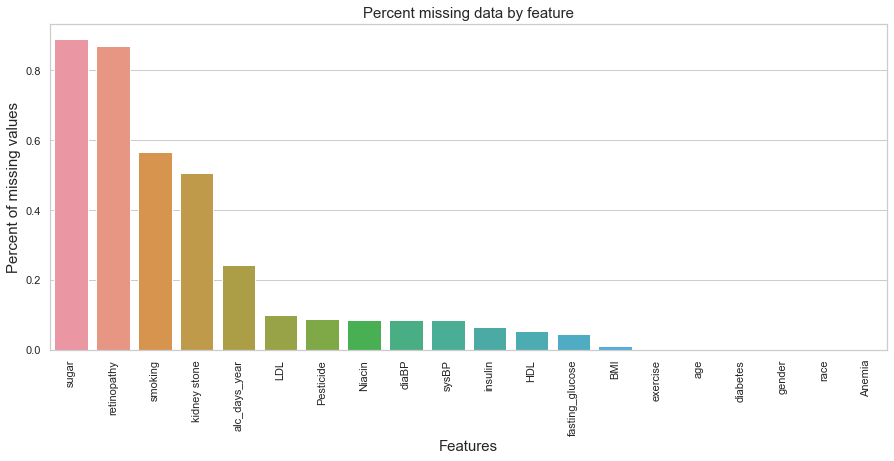

In [77]:
# purpose:   get the ratio of (missing values)/(total entries) for ***one feature***  
# input:     df: dataframe that contains the feature you want to check for NaN ratio
#            feature: the name of the feature - string           
# output:    NaN ratio of the feature, and instructions on what to do next 

def get_NaN_ratio(df,feature):
    print()
    total_count = df.shape[0]                  # total entries
    feature_valid_count = df[feature].count()  # non-NaN entries for chosen feature
    feature_null_count = total_count - feature_valid_count
    NaN_ratio = feature_null_count/total_count
    print('The NaN ratio in',feature,'is',"%.3f" % NaN_ratio)
    if NaN_ratio == 0:
        print('No missing values detected')
    elif NaN_ratio <= 0.1:
        print('Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category')
        print('Now call function: fill_NaN(df, feature, fill_type)')
    else:
        print('Since NaN ratio is large, predict NaN using ML or check predictability first...')
        print('if check predictability, call: check_predictability_all/some_x(df,y,method)')
        print('if predict using ML, call: predict_NaN_with_ML(df,x,y,data_type,model)')

# features = df.columns.values.tolist()
# for feature in features:
#     get_NaN_ratio(df,feature)
#     print('----------------------')


def plot_NaN_percentage_for_all(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    # missing_data.head()
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missing_data.index, y=missing_data['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    
    
plot_NaN_percentage_for_all(df)
df.info()

### Outliers

In [78]:
# Function to Detection Outliers

def find_anomalies(data, a):
    anomalies_a = []
    patient_a = []

    # Set upper and lower limit to 3 standard deviation 
    random_data_std = data.std()
    random_data_mean = data.mean()
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    # Generate outliers
    for i in data:
        if i > upper_limit or i < lower_limit:
            anomalies_a.append(i)
            index_value_i = (data==i).index
            patient_a.append(index_value_i)
    return anomalies_a
    #return patient_a

print(df.columns)
   
   




Index(['Anemia', 'BMI', 'HDL', 'LDL', 'Niacin', 'Pesticide', 'age',
       'alc_days_year', 'diabetes', 'exercise', 'fasting_glucose', 'gender',
       'insulin', 'kidney stone', 'race', 'retinopathy', 'smoking', 'sugar',
       'sysBP', 'diaBP'],
      dtype='object')


67


count    5268.000000
mean       28.803797
std         6.480090
min        15.100000
25%        24.000000
50%        27.850000
75%        32.400000
max        50.500000
Name: BMI, dtype: float64

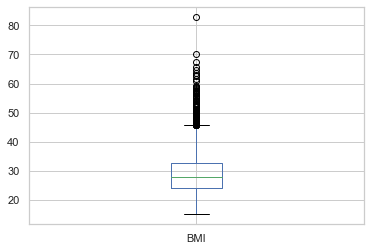

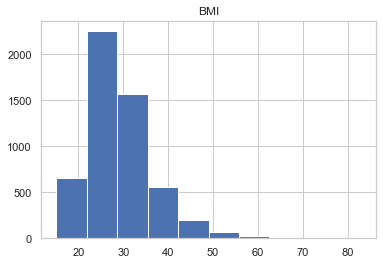

In [79]:
print(len(find_anomalies(df["BMI"],1)))
boxplot = df.boxplot(column=['BMI'])
hist = df.hist(column=['BMI'])
for i in find_anomalies(df["BMI"],1):
    df = df[df.BMI != i]
df["BMI"].describe()

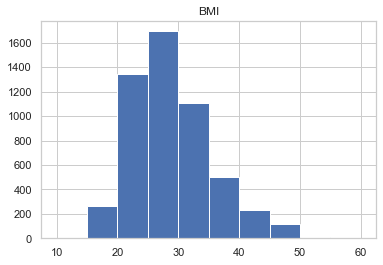

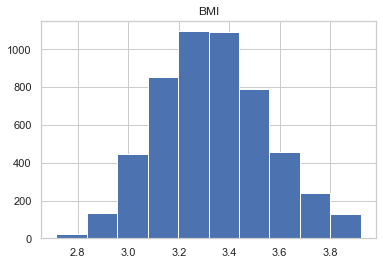

In [80]:
hist_before = df.hist(column=['BMI'], range=[10, 60])
df["BMI"] = np.log(df["BMI"])
hist_after = df.hist(column=['BMI'])


52


count    4965.000000
mean        1.414854
std         0.441907
min         0.160000
25%         1.110000
50%         1.340000
75%         1.660000
max         5.840000
Name: HDL, dtype: float64

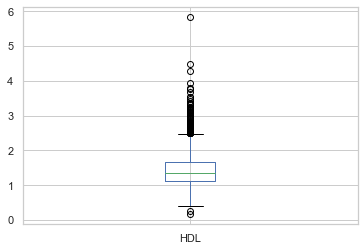

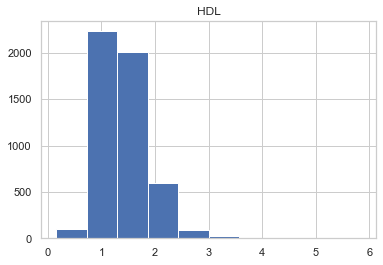

In [81]:
print(len(find_anomalies(df["HDL"],2)))
boxplot = df.boxplot(column=['HDL'])
hist = df.hist(column=['HDL'])
for i in find_anomalies(df["HDL"],2):
    df = df[df.LDL != i]
df["HDL"].describe()

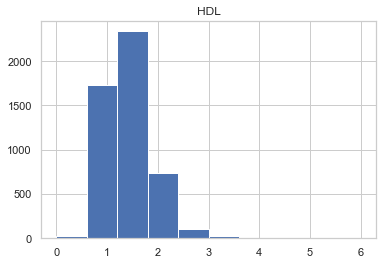

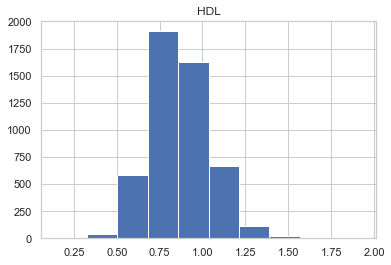

In [82]:
hist_before = df.hist(column=['HDL'], range=[0, 6])
df["HDL"] = np.log(df["HDL"]+1)
hist_after = df.hist(column=['HDL'])



29


count    4675.000000
mean        2.846410
std         0.882775
min         0.362000
25%         2.198000
50%         2.767000
75%         3.414000
max         5.637000
Name: LDL, dtype: float64

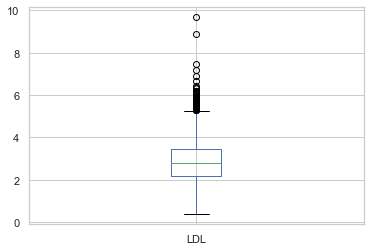

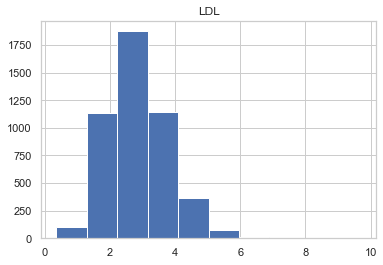

In [83]:
print(len(find_anomalies(df["LDL"],3)))
boxplot = df.boxplot(column=['LDL'])
hist = df.hist(column=['LDL'])
for i in find_anomalies(df["LDL"],3):
    df = df[df.LDL != i]
df["LDL"].describe()

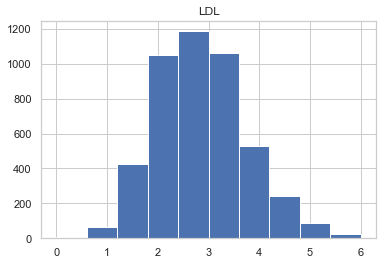

In [84]:
hist_before = df.hist(column=['LDL'], range = [0,6])


117


count    4851.000000
mean        5.855021
std         1.222565
min         1.170000
25%         5.162000
50%         5.551000
75%         6.106000
max        12.323000
Name: fasting_glucose, dtype: float64

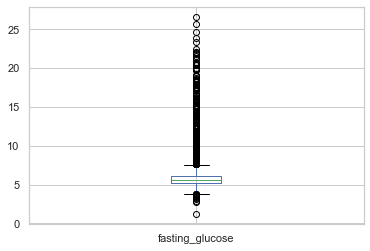

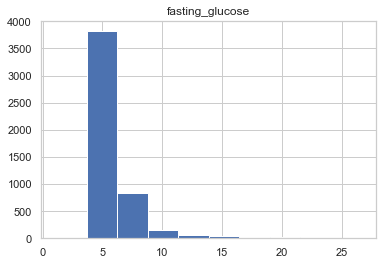

In [85]:
print(len(find_anomalies(df["fasting_glucose"],4)))
boxplot = df.boxplot(column=['fasting_glucose'])
hist = df.hist(column=['fasting_glucose'])
for i in find_anomalies(df["fasting_glucose"],4):
    df = df[df.fasting_glucose != i]
df["fasting_glucose"].describe()

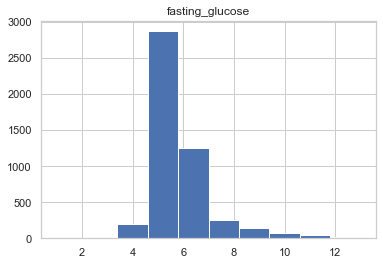

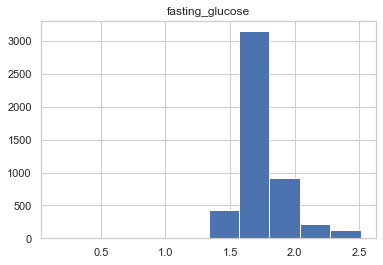

In [86]:
hist_before = df.hist(column=['fasting_glucose'], range = [1,13])
df["fasting_glucose"] = np.log(df["fasting_glucose"])
hist_after = df.hist(column=['fasting_glucose'])

53


count    4709.000000
mean       71.755400
std        58.392057
min         0.840000
25%        34.680000
50%        54.780000
75%        87.240000
max       422.520000
Name: insulin, dtype: float64

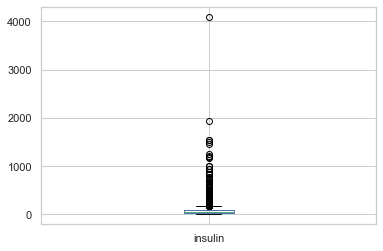

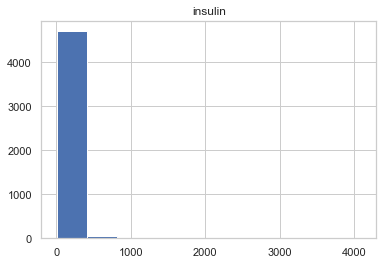

In [87]:
print(len(find_anomalies(df["insulin"],5)))
boxplot = df.boxplot(column=['insulin'])
hist = df.hist(column=['insulin'])
for i in find_anomalies(df["insulin"],5):
    df = df[df.insulin != i]
df["insulin"].describe()

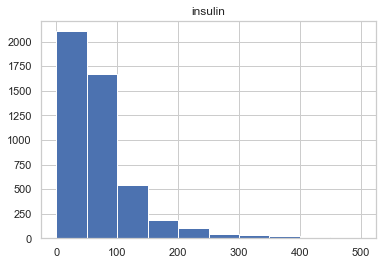

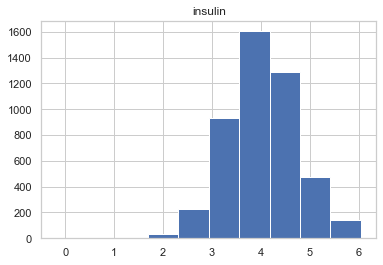

In [88]:
hist_before = df.hist(column=['insulin'], range=[0, 500])
df["insulin"] = np.log(df["insulin"])
hist_after = df.hist(column=['insulin'])

15


count    541.000000
mean       1.368373
std        1.666304
min        0.010000
25%        0.130000
50%        0.670000
75%        2.000000
max        8.100000
Name: sugar, dtype: float64

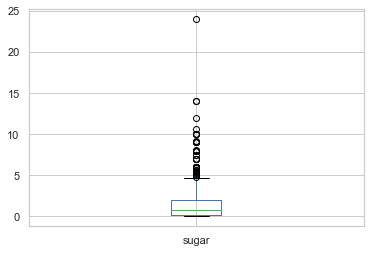

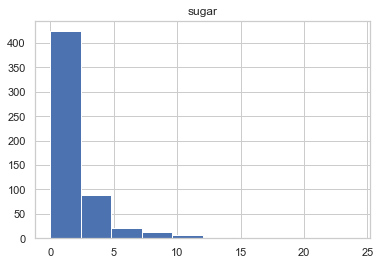

In [89]:
print(len(find_anomalies(df["sugar"],6)))
boxplot = df.boxplot(column=['sugar'])
hist = df.hist(column=['sugar'])
for i in find_anomalies(df["sugar"],6):
    df = df[df.sugar != i]
df["sugar"].describe()

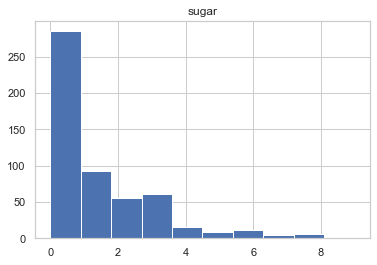

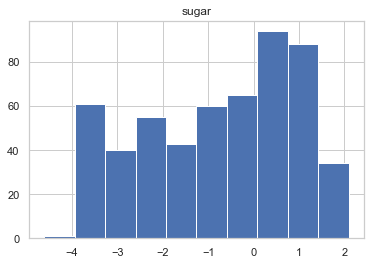

In [90]:
hist_before = df.hist(column=['sugar'], range=[0, 9])
df["sugar"] = np.log(df["sugar"])
hist_after = df.hist(column=['sugar'])

54


count    4550.000000
mean      122.463736
std        16.564737
min        70.666667
25%       110.666667
50%       119.333333
75%       132.000000
max       177.333333
Name: sysBP, dtype: float64

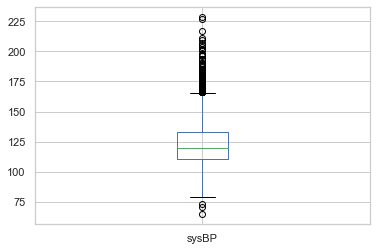

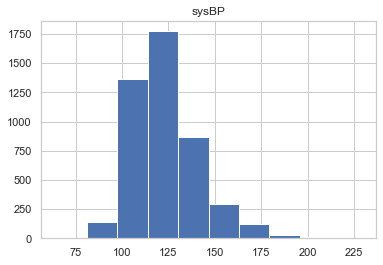

In [91]:
print(len(find_anomalies(df["sysBP"],7)))
boxplot = df.boxplot(column=['sysBP'])
hist = df.hist(column=['sysBP'])
for i in find_anomalies(df["sysBP"],7):
    df = df[df.sysBP != i]
df["sysBP"].describe()

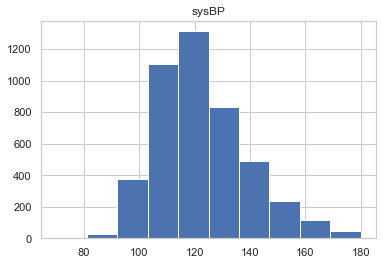

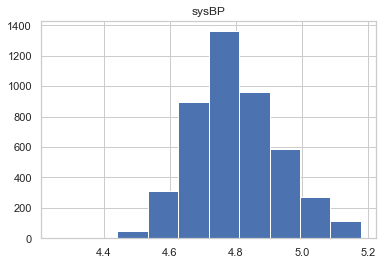

In [92]:
hist_before = df.hist(column=['sysBP'], range=[70, 180])
df["sysBP"] = np.log(df["sysBP"])
hist_after = df.hist(column=['sysBP'])

52


count    4498.000000
mean       68.870313
std        10.950419
min        32.000000
25%        62.000000
50%        68.666667
75%        76.000000
max       104.666667
Name: diaBP, dtype: float64

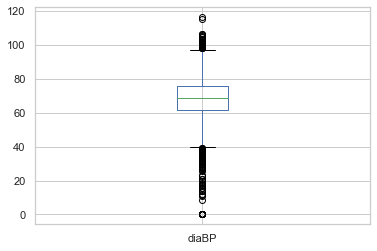

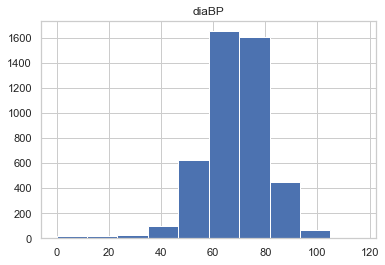

In [93]:
print(len(find_anomalies(df["diaBP"],8)))
boxplot = df.boxplot(column=['diaBP'])
hist = df.hist(column=['diaBP'])
for i in find_anomalies(df["diaBP"],8):
    df = df[df.diaBP != i]
df["diaBP"].describe()

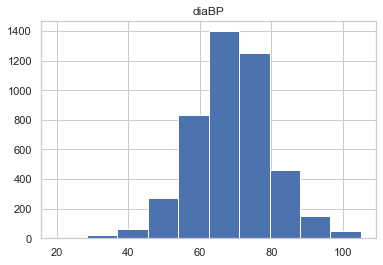

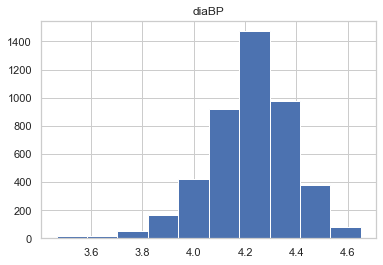

In [94]:
hist_before = df.hist(column=['diaBP'], range=[20, 105])
df["diaBP"] = np.log(df["diaBP"])
hist_after = df.hist(column=['diaBP'])

12


count    2128.000000
mean       17.457237
std         6.493428
min         0.000000
25%        15.000000
50%        17.000000
75%        20.000000
max        64.000000
Name: smoking, dtype: float64

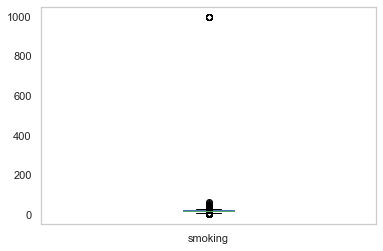

In [95]:
#smoking is 
print(len(find_anomalies(df["smoking"],9)))
boxplot = df.boxplot(column=['smoking'],grid=False)
#hist = df.hist(column=['smoking'])
for i in find_anomalies(df["smoking"],9):
    df = df[df.smoking != i]
df["smoking"].describe()
# infinity exists

In [96]:
df=df[df.smoking!=float("-Inf")]
df["smoking"].value_counts()

18.0    305
16.0    242
17.0    217
15.0    204
14.0    141
20.0    140
19.0    137
13.0    103
0.0      90
21.0     87
22.0     72
12.0     63
25.0     54
23.0     42
30.0     32
24.0     25
11.0     21
10.0     17
27.0     16
9.0      15
26.0     14
35.0     12
28.0     10
8.0       8
40.0      8
7.0       7
32.0      7
42.0      6
37.0      4
45.0      4
36.0      4
29.0      3
39.0      3
31.0      2
44.0      2
38.0      2
46.0      2
55.0      1
41.0      1
49.0      1
34.0      1
64.0      1
58.0      1
43.0      1
Name: smoking, dtype: int64

3


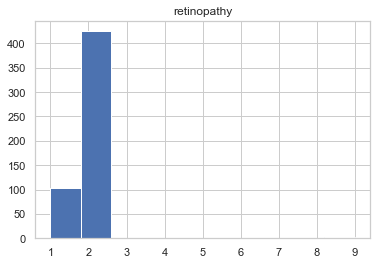

In [97]:
print(len(find_anomalies(df["retinopathy"],9)))
hist = df.hist(column=['retinopathy'])
for i in find_anomalies(df["retinopathy"],9):
    df = df[df.retinopathy != i]


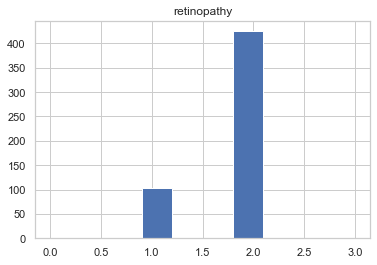

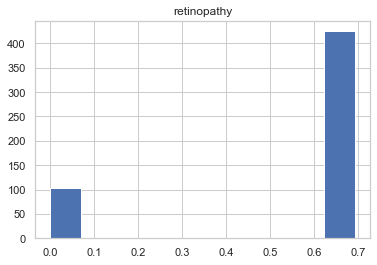

In [98]:
df["retinopathy"].describe()
hist_before = df.hist(column=['retinopathy'], range=[0, 3])
df["retinopathy"] = np.log(df["retinopathy"])
hist_after = df.hist(column=['retinopathy'])


2


count    4908.000000
mean        1.626732
std         0.483722
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: exercise, dtype: float64

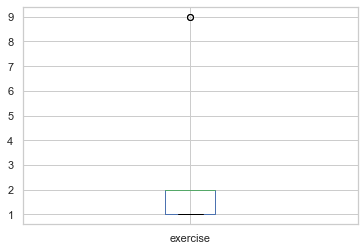

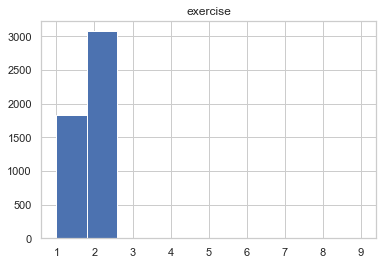

In [99]:
print(len(find_anomalies(df["exercise"],10)))
boxplot = df.boxplot(column=['exercise'])
hist = df.hist(column=['exercise'])
for i in find_anomalies(df["exercise"],10):
    df = df[df.exercise != i]
df["exercise"].describe()

In [100]:
# droup outlier when exercise ==9
df=df[df.exercise!=9]

0


count    529.000000
mean       0.556876
std        0.275735
min        0.000000
25%        0.693147
50%        0.693147
75%        0.693147
max        0.693147
Name: retinopathy, dtype: float64

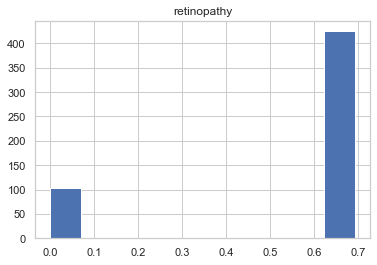

In [101]:
print(len(find_anomalies(df["retinopathy"],9)))
hist = df.hist(column=['retinopathy'])
for i in find_anomalies(df["retinopathy"],9):
    df = df[df.retinopathy != i]
df["retinopathy"].describe()

63


count    4416.000000
mean       24.562149
std        13.005086
min         0.215000
25%        15.304000
50%        22.125000
75%        30.723000
max        76.653000
Name: Niacin, dtype: float64

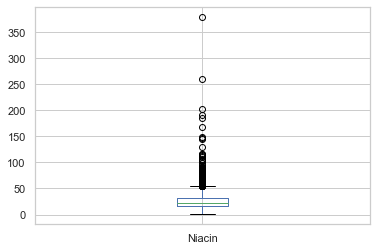

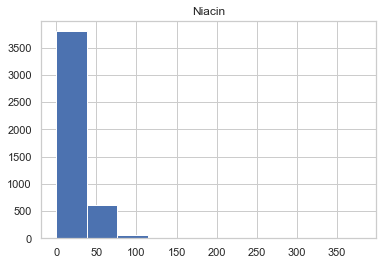

In [37]:
print(len(find_anomalies(df["Niacin"],10)))
boxplot = df.boxplot(column=['Niacin'])
hist = df.hist(column=['Niacin'])
for i in find_anomalies(df["Niacin"],10):
    df = df[df.Niacin != i]
df["Niacin"].describe()

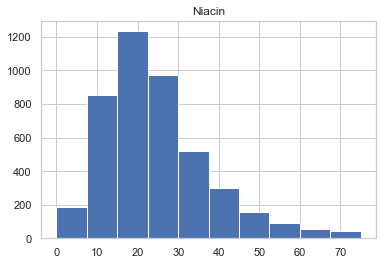

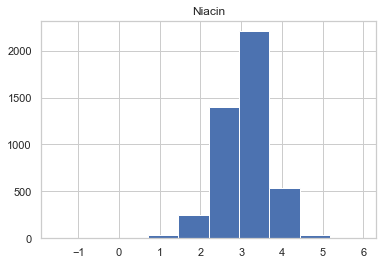

In [102]:
df["Niacin"].describe()
hist_before = df.hist(column=['Niacin'], range=[0, 75])
df["Niacin"] = np.log(df["Niacin"])
hist_after = df.hist(column=['Niacin'])

### Imputation of Missing values

In [103]:
# purpose:   Plot histograms showing the distribution of a feature before and after filling NaN
#            to see the change in distribution. This can tell you if the filling method is 
#            correct or not.
# input:     feature0: str0
#            feature: str
#            title of the plot

def plot_before_after(before,after,feature):
    fig, ax = plt.subplots()
    ax.hist(after,alpha=0.5,color='red')
    ax.hist(before)
    ax.legend(['after','before'])
    plt.title('Before vs. After(no NaN):'+feature)
    plt.ylabel('Frequency')

def plot_feature(feature):
    plt.figure()
    df[feature].hist()
    plt.title(feature)
    plt.ylabel('Frequency')

In [104]:
# function:  fill_NaN(df, feature, fill_type)
# purpose:   fill the missing values in ***one column/feature*** in the given df. 
# input:     df: the df containing the target column to be filled
#            feature: the column whose NaN's are dealt with
#            fill_type: choose among -> 'mean', 'mode', 'zero' 
#                       mean: if the feature is continuous without outliers - normal distribution
#                       median: if the feature is continuous with outliers - skewed distribution
#                       mode: if the feature is categorical
# output:    a df whose target column is filled (no more NaN in that col)

def fill_NaN(df, feature, fill_type):    
    before_filling = df[feature].dropna().copy(deep=True)
    if fill_type == 'mean':
        after_filling = df[feature].fillna(df[feature].dropna().mean())
    elif fill_type == 'mode':
        after_filling = df[feature].fillna(df[feature].dropna().mode().iloc[0])
    elif fill_type == 'std':
        after_filling = fill_NaN_std(df, feature)
#     elif fill_type == 'median':
#         after_filling = df[feature].fillna(df[feature].dropna().median())
    else:
        # fill type == 'zero' (new category)
        # set missing values as another category 
        # cannot set this new cat as 0 since there could be 0 after applying clean_epsilon function  
        # need to get a unique number representing NaN as a new category 
        new_type = 0
        after_filling = df[feature].fillna(new_type)   
    df[feature] = after_filling
    plot_before_after(before_filling, after_filling, feature)
    return df


def fill_NaN_std(df,feature):
    feature_avg = df[feature].mean()
    feature_std = df[feature].std()
    feature_null_count = df[feature].isnull().sum()
    feature_null_random_list = np.random.randint(feature_avg - feature_std, feature_avg + feature_std, size=feature_null_count)
    df[feature][np.isnan(df[feature])] = feature_null_random_list
    after_filling = df[feature].astype(int)
    return after_filling




In [105]:
# function:  predict_NaN_with_ML(df,x,y,data_type,model)
# purpose:   predict the values of NaN and fill these predicted values back into the dataframe
# input:     df: the dataframe containing the features used for prediction and target y(target feature)
#            x: a list of strings - features used for prediction - no NAN in all x's
#            y: a string - target feature
#            data_type: a string ->'categorical','numerical'
#            
# process: CV was used to set the hyperparamters ; and the model with a higher accuracy was chosen to impute the missing data


def predict_NaN_with_ML(df,x,y,data_type):
    before_filling = df[y].dropna().copy(deep=True)
    # build model using valid entries  
    valid_entries = df[df[y].notnull()]                # rows where y is not NaN (valid entries)
    print(valid_entries)
    valid_entries_x = valid_entries[x]                 # all x's for valid rows (x's are not NaN)
    print(valid_entries_x)
    valid_entries_y = valid_entries[y]                 # y for valid rows (y's are not NaN) 
    print(valid_entries_y)
    valid_entries_x = valid_entries_x.astype(float)    # change data type to float
    valid_entries_y = valid_entries_y.astype(float)
    
        
    if data_type == 'categorical':
        #Random Forest
        n_estimators = [int(x) for x in np.linspace(start = 5, stop = 10, num = 1)]
        max_features = ['auto', 'sqrt']
        max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
        max_depth.append(None)
        min_samples_split = [10, 20]
        min_samples_leaf = [10, 20]
        bootstrap = [True, False]
        random_grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}
        rf = RandomForestClassifier()
        rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
        rf_random.fit(valid_entries_x, valid_entries_y)
        estimators = rf_random.best_params_['n_estimators']
        features = rf_random.best_params_['max_features']
        depth = rf_random.best_params_['max_depth']
        samples_split_min = rf_random.best_params_['min_samples_split']
        samples_leaf_min = rf_random.best_params_['min_samples_leaf']
        bstrap = rf_random.best_params_['bootstrap']
        rf_random.best_score_
        print("The best accuracy of", rf_random.best_score_, "is given by",estimators , "estimators", features, "max features", depth, "max_depth",samples_split_min, "min samples split", samples_leaf_min,"min samples leaf", bstrap, "bootstrap", "parameters" )


        #kNN
        k_range = list(range(1, 50))
        param_grid = dict(n_neighbors=k_range)
        grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
        grid.fit(valid_entries_x, valid_entries_y)
        k = grid.best_params_["n_neighbors"]
        print("The best accuracy of", grid.best_score_, "is given by", k, "clusters")

            
       
        if rf_random.best_score_>grid.best_score_ :
            algo = RandomForestClassifier(n_estimators=estimators,max_features=features,max_depth=depth,min_samples_split=samples_split_min,  min_samples_leaf=samples_leaf_min, bootstrap =  bstrap)   
            print("Random Forest provides better accuracy")
            algo.fit(valid_entries_x, valid_entries_y)
               
            #predict y (target feature)
            nan_entries = df[df[y].isnull()]                    # rows where y is NaN     
            nan_entries_x = nan_entries[x].astype(float)    
            nan_entries_y = nan_entries[y].astype(float)
    
            predict_y = algo.predict(nan_entries_x)             # predict NaN y based on x on the same entries    
            df.loc[df[y].isna(), y] = predict_y                 # fill the missing values with predicted data
            print('Features used for predicting',y, 'are:',x)
            print('The number of predicted values:',len(predict_y))
    
            after_filling = df[y]
            plot_before_after(before_filling, after_filling, y)
        else:
            algo = KNeighborsClassifier(n_neighbors=k)
            print("kNN provides better accuracy")
            algo.fit(valid_entries_x, valid_entries_y)
            
            #predict y (target feature)
            nan_entries = df[df[y].isnull()]                    # rows where y is NaN     
            nan_entries_x = nan_entries[x].astype(float)    
            nan_entries_y = nan_entries[y].astype(float)
    
            predict_y = algo.predict(nan_entries_x)             # predict NaN y based on x on the same entries    
            df.loc[df[y].isna(), y] = predict_y                 # fill the missing values with predicted data
            print('Features used for predicting',y, 'are:',x)
            print('The number of predicted values:',len(predict_y))
    
            after_filling = df[y]
            plot_before_after(before_filling, after_filling, y)

                
    elif data_type == 'numerical':
        #Random Forest
        n_estimators = [int(x) for x in np.linspace(start = 5, stop = 10, num = 1)]
        max_features = ['auto', 'sqrt']
        max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
        max_depth.append(None)
        min_samples_split = [10, 20]
        min_samples_leaf = [10, 20]
        bootstrap = [True, False]
        random_grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}
        rf = RandomForestRegressor()
        rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
        rf_random.fit(valid_entries_x, valid_entries_y)
        estimators = rf_random.best_params_['n_estimators']
        features = rf_random.best_params_['max_features']
        depth = rf_random.best_params_['max_depth']
        samples_split_min = rf_random.best_params_['min_samples_split']
        samples_leaf_min = rf_random.best_params_['min_samples_leaf']
        bstrap = rf_random.best_params_['bootstrap']
        rf_random.best_score_
        print("The best accuracy of", rf_random.best_score_, "is given by",estimators , "estimators", features, "max features", depth, "max_depth",samples_split_min, "min samples split", samples_leaf_min,"min samples leaf", bstrap, "bootstrap", "parameters" )

        #kNN
        k_range = list(range(1, 50))
        param_grid = dict(n_neighbors=k_range)
        grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
        grid.fit(valid_entries_x, valid_entries_y)
        k = grid.best_params_["n_neighbors"]
        print("The best accuracy of", grid.best_score_, "is given by", k, "clusters")
        
        
        
        if rf_random.best_score_>grid.best_score_ :
            algo = RandomForestRegressor(n_estimators=estimators,max_features=features,max_depth=depth,  min_samples_split=samples_split_min,  min_samples_leaf=samples_leaf_min, bootstrap =  bstrap)   
            print("Random Forest provides better accuracy")
            algo.fit(valid_entries_x, valid_entries_y)
               
            #predict y (target feature)
            nan_entries = df[df[y].isnull()]                    # rows where y is NaN     
            nan_entries_x = nan_entries[x].astype(float)    
            nan_entries_y = nan_entries[y].astype(float)
    
            predict_y = algo.predict(nan_entries_x)             # predict NaN y based on x on the same entries    
            df.loc[df[y].isna(), y] = predict_y                 # fill the missing values with predicted data
            print('Features used for predicting',y, 'are:',x)
            print('The number of predicted values:',len(predict_y))
    
            after_filling = df[y]
            plot_before_after(before_filling, after_filling, y)
        else:
            algo = KNeighborsRegressor(n_neighbors=k)
            print("kNN provides better accuracy")
            categorial = ['12drinksayear','5drinksaday','5drinks2hours','gender','race']
            numerical = ['BMI','LDL','age','fasting_glucose','sysBP','diaBP','sugar']
            for i in x:
                if i in numerical:
                    valid_entries_x['i'] = preprocessing.scale(valid_entries_x['i'])
   
            algo.fit(valid_entries_x, valid_entries_y)
            
            #predict y (target feature)
            nan_entries = df[df[y].isnull()]                    # rows where y is NaN     
            nan_entries_x = nan_entries[x].astype(float)    
            nan_entries_y = nan_entries[y].astype(float)
    
            predict_y = algo.predict(nan_entries_x)             # predict NaN y based on x on the same entries    
            df.loc[df[y].isna(), y] = predict_y                 # fill the missing values with predicted data
            print('Features used for predicting',y, 'are:',x)
            print('The number of predicted values:',len(predict_y))
    
            after_filling = df[y]
            plot_before_after(before_filling, after_filling, y)
    

In [106]:
#Drop the entire patient entry if that entry contains more than 6 NaN features out of 16 features (keep entries with more than 10 non-NaN values)
before = len(df.index)
df.dropna(thresh = 10,inplace = True)
after = len(df.index)
print(before-after,'patient entries are dropped since they contain more than 6 NaN variables')

20 patient entries are dropped since they contain more than 6 NaN variables


In [107]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 4888 entries, 73559.0 to 93697.0
Data columns (total 20 columns):
Anemia             4888 non-null float64
BMI                4843 non-null float64
HDL                4640 non-null float64
LDL                4411 non-null float64
Niacin             4473 non-null float64
Pesticide          4464 non-null float64
age                4888 non-null float64
alc_days_year      3705 non-null float64
diabetes           4888 non-null float64
exercise           4888 non-null float64
fasting_glucose    4667 non-null float64
gender             4888 non-null float64
insulin            4583 non-null float64
kidney stone       2424 non-null float64
race               4888 non-null float64
retinopathy        528 non-null float64
smoking            2125 non-null float64
sugar              530 non-null float64
sysBP              4473 non-null float64
diaBP              4473 non-null float64
dtypes: float64(20)
memory usage: 801.9 KB


In [108]:
#drop Niacin which have 0 unit.
df.drop(['Niacin'],axis=1,inplace=True)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4888 entries, 73559.0 to 93697.0
Data columns (total 19 columns):
Anemia             4888 non-null float64
BMI                4843 non-null float64
HDL                4640 non-null float64
LDL                4411 non-null float64
Pesticide          4464 non-null float64
age                4888 non-null float64
alc_days_year      3705 non-null float64
diabetes           4888 non-null float64
exercise           4888 non-null float64
fasting_glucose    4667 non-null float64
gender             4888 non-null float64
insulin            4583 non-null float64
kidney stone       2424 non-null float64
race               4888 non-null float64
retinopathy        528 non-null float64
smoking            2125 non-null float64
sugar              530 non-null float64
sysBP              4473 non-null float64
diaBP              4473 non-null float64
dtypes: float64(19)
memory usage: 763.8 KB


### Adding dummy variables to indicate missing value in a given row for each feature

In [110]:
df.index = range(len(df))
for x in ['BMI', 'fasting_glucose', 'gender', 'LDL','HDL','insulin','age', 'race', 'sugar', 'sysBP', 'diaBP','alc_days_year','retinopathy','exercise']:
    dummy=pd.get_dummies(df[x],dummy_na=True)
    dummy.columns=dummy.columns.astype(str)
    y=x+"_"+"NaN"
    dummy.rename(columns={'nan':y},inplace= True)
    s=pd.DataFrame(dummy[y])
    df=pd.concat([df,s],axis=1)
print(df)

      Anemia       BMI       HDL    LDL  Pesticide   age  alc_days_year  \
0        2.0  3.363842  0.936093  1.448        1.0  72.0            0.0   
1        2.0  2.980619  1.163151  2.612        2.0  73.0            0.0   
2        2.0  3.575151  0.916291  2.508        2.0  61.0            2.0   
3        2.0  3.010621  1.247032  1.733        2.0  26.0            2.0   
4        2.0  3.126761  0.862890  1.940        2.0  33.0            NaN   
...      ...       ...       ...    ...        ...   ...            ...   
4883     2.0  3.039749  0.985817    NaN        NaN  41.0            NaN   
4884     2.0  3.335770  1.128171  1.888        2.0  69.0            0.0   
4885     2.0  3.068053  1.015231  1.448        2.0  76.0            NaN   
4886     2.0  3.520461       NaN    NaN        2.0  26.0            NaN   
4887     2.0  3.433987  1.360977  3.284        2.0  80.0            2.0   

      diabetes  exercise  fasting_glucose  ...  HDL_NaN  insulin_NaN  age_NaN  \
0          1.0    

### BMI was first chosen as it had the lowest % of missing values 

#### Numerical variable with no cstr
below 18.5 – underweight
between 18.5 and 24.9 – healthy weight range
between 25 and 29.9 - overweight (diabetes risk factor)


The NaN ratio in BMI is 0.009
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


count    4888.000000
mean        3.332478
std         0.216706
min         2.714695
25%         3.173878
50%         3.325036
75%         3.471966
max         3.921973
Name: BMI, dtype: float64

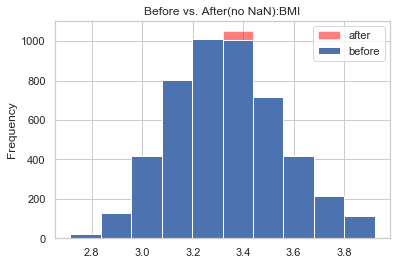

In [111]:
get_NaN_ratio(df,'BMI')
fill_NaN(df,'BMI','mean')
df['BMI'].describe()

### Fasting glucose has the second highest % of missing data

#### 
The fasting plasma glucose test (FPG) is the preferred method of screening for diabetes. The FPG measures a person's blood sugar level after fasting or not eating anything for at least 8 hours.

The global mean fasting plasma blood glucose level in humans is about 5.5 mmol/L (100 mg/dL); however, this level fluctuates throughout the day.
FPG test results:
normal: less than 5.6 mmol/L
prediabetes: 5.6 ~ 6.9 mmol/L
diabetes: 7 mmol/L or higher (on two separate tests)


The NaN ratio in fasting_glucose is 0.045
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


count    4888.000000
mean        1.744910
std         0.172245
min         0.157004
25%         1.652114
50%         1.724016
75%         1.800058
max         2.511467
Name: fasting_glucose, dtype: float64

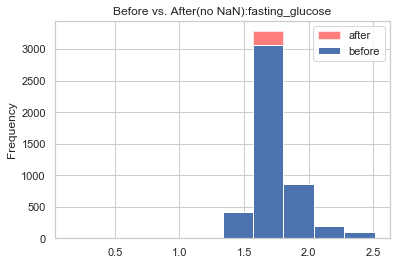

In [112]:
get_NaN_ratio(df,'fasting_glucose')
df = fill_NaN(df,'fasting_glucose','mean')
df['fasting_glucose'].describe()

### HDL


The NaN ratio in HDL is 0.051
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


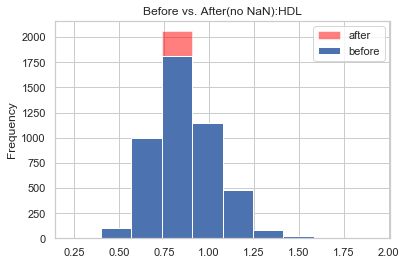

In [113]:
# Check for NaN 
get_NaN_ratio(df,'HDL')

# Since NaN ratios are small, replace NaN with mean values
df = fill_NaN(df,'HDL','mean')


### Insulin


The NaN ratio in insulin is 0.062
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


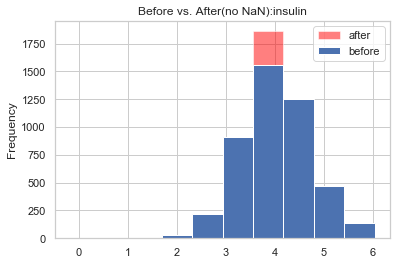

In [114]:
# Check for NaN 
get_NaN_ratio(df,'insulin')

# Since NaN ratios are small, replace NaN with mean values
df = fill_NaN(df,'insulin','mean')


### Blood Pressure

####
High blood pressure, or hypertension, is a condition that’s seen in people with type 2 diabetes. It’s unknown why there’s such a significant relationship between the two diseases. It’s believed that the following contribute to both conditions:

obesity
a diet high in fat and sodium
chronic inflammation
inactivity
The combination of high blood pressure and type 2 diabetes is particularly lethal and can significantly raise your risk of having a heart attack or stroke.


The NaN ratio in sysBP is 0.085
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)

The NaN ratio in diaBP is 0.085
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


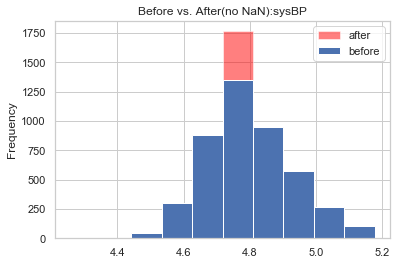

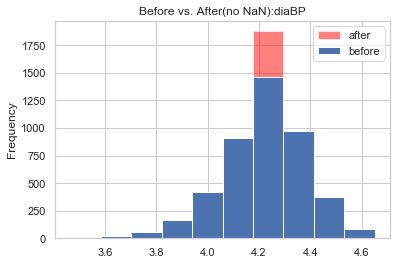

In [115]:
# Check for NaN in sysBP and diaBP
get_NaN_ratio(df,'sysBP')
get_NaN_ratio(df,'diaBP')

# Since NaN ratios are small, replace NaN with mean values
df = fill_NaN(df,'sysBP','mean')
df = fill_NaN(df,'diaBP','mean')

### LDL 

####
cholesterol (mg/dL) - values: 23 to 277
LDL stands for low-density lipoproteins. It is sometimes called the "bad" cholesterol because a high LDL level leads to a buildup of cholesterol in your arteries. This extra LDL, along with other substances, forms plaque.
Diabetes tends to lower HDL levels and raise triglyceride and LDL levels, which increases the risk for heart disease and stroke.


The NaN ratio in LDL is 0.098
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)

NaN    0
2.848917    477
2.664000     66
2.948000     66
2.689000     60
2.767000     58
           ... 
0.672000      1
5.431000      1
5.405000      1
0.879000      1
0.724000      1
Name: LDL, Length: 190, dtype: int64


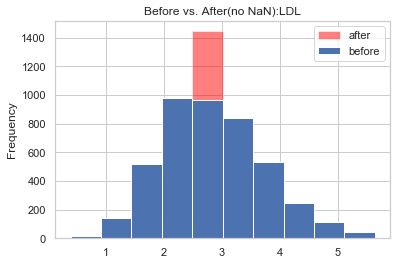

In [116]:
# Check for NaN 
get_NaN_ratio(df,'LDL')
df = fill_NaN(df,'LDL','mean')
get_value_count(df,'LDL')

In [117]:
df.columns.values.tolist()

['Anemia',
 'BMI',
 'HDL',
 'LDL',
 'Pesticide',
 'age',
 'alc_days_year',
 'diabetes',
 'exercise',
 'fasting_glucose',
 'gender',
 'insulin',
 'kidney stone',
 'race',
 'retinopathy',
 'smoking',
 'sugar',
 'sysBP',
 'diaBP',
 'BMI_NaN',
 'fasting_glucose_NaN',
 'gender_NaN',
 'LDL_NaN',
 'HDL_NaN',
 'insulin_NaN',
 'age_NaN',
 'race_NaN',
 'sugar_NaN',
 'sysBP_NaN',
 'diaBP_NaN',
 'alc_days_year_NaN',
 'retinopathy_NaN',
 'exercise_NaN']

In [118]:
# Check for NaN 
get_NaN_ratio(df,'smoking')
# drop smoking because of the ratio is too high
# Check for NaN 
get_NaN_ratio(df,'exercise')

# Check for NaN 
get_NaN_ratio(df,'retinopathy')
# drop retinopathy because of the ratio of missing value is too high


The NaN ratio in smoking is 0.565
Since NaN ratio is large, predict NaN using ML or check predictability first...
if check predictability, call: check_predictability_all/some_x(df,y,method)
if predict using ML, call: predict_NaN_with_ML(df,x,y,data_type,model)

The NaN ratio in exercise is 0.000
No missing values detected

The NaN ratio in retinopathy is 0.892
Since NaN ratio is large, predict NaN using ML or check predictability first...
if check predictability, call: check_predictability_all/some_x(df,y,method)
if predict using ML, call: predict_NaN_with_ML(df,x,y,data_type,model)


In [56]:
#retinopathy, SMOKING too much nan, drop values


The NaN ratio in Pesticide is 0.087
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)

NaN    0
2.000000    3950
1.000000     502
1.906362     424
9.000000      12
Name: Pesticide, dtype: int64


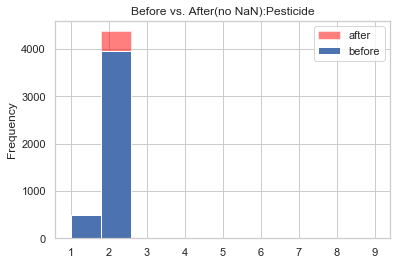

In [120]:
# Pesticide
get_NaN_ratio(df,'Pesticide')
df = fill_NaN(df,'Pesticide','mean')
get_value_count(df,'Pesticide')

### Diabetes

In [121]:
# Change 2(NHANES for No) to 0(False - boolean) for features with YES/NO answers
df.loc[df['diabetes'] == 2,['diabetes']] = 0
df['diabetes'].value_counts()
df = process_cstr(df,feature='diabetes',method='drop',cstr=[7,9])

In [122]:
get_NaN_ratio(df,'diabetes')
df['diabetes'].value_counts()


The NaN ratio in diabetes is 0.000
No missing values detected


0.0    4227
1.0     528
3.0     131
Name: diabetes, dtype: int64

In [123]:
db_counts = df['diabetes'].value_counts().to_dict()
percentage_yes_db = db_counts[1.0]/df['diabetes'].shape[0]
percentage_pre_db = db_counts[3.0]/df['diabetes'].shape[0]
percentage_no_db = db_counts[0.0]/df['diabetes'].shape[0]
print(percentage_yes_db*100,'% people have diabetes')
print(percentage_pre_db*100,'% people are pre diabetes')
print(percentage_no_db*100,'% people do not have diabetes')


10.806385591485878 % people have diabetes
2.6811297584936553 % people are pre diabetes
86.51248465002047 % people do not have diabetes


In [124]:
df = df[df['diabetes'] != 3.0]
df['diabetes'].value_counts()
percentage_no_db = db_counts[0.0]/df['diabetes'].shape[0]
print('Baseline accuracy',percentage_no_db*100)


Baseline accuracy 88.89589905362776


In [125]:
#Final NaN check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4755 entries, 0 to 4887
Data columns (total 33 columns):
Anemia                 4755 non-null float64
BMI                    4755 non-null float64
HDL                    4755 non-null float64
LDL                    4755 non-null float64
Pesticide              4755 non-null float64
age                    4755 non-null float64
alc_days_year          3597 non-null float64
diabetes               4755 non-null float64
exercise               4755 non-null float64
fasting_glucose        4755 non-null float64
gender                 4755 non-null float64
insulin                4755 non-null float64
kidney stone           2352 non-null float64
race                   4755 non-null float64
retinopathy            528 non-null float64
smoking                2062 non-null float64
sugar                  512 non-null float64
sysBP                  4755 non-null float64
diaBP                  4755 non-null float64
BMI_NaN                4755 non-null uin

In [126]:
#Drop Sugar and alc_days_year since they have a high % of missing values 
df.drop(['sugar', 'alc_days_year'], axis=1, inplace = True)


### One Hot Encoding

In [64]:
#Race
df['race'] = pd.Categorical(df['race'])
dfDummies = pd.get_dummies(df['race'], prefix = 'race')
df = pd.concat([df, dfDummies], axis=1)

#Gender
df['gender'] = pd.Categorical(df['gender'])
dfDummies = pd.get_dummies(df['gender'], prefix = 'gender')
df = pd.concat([df, dfDummies], axis=1)

df.drop(['race', 'gender'], axis=1, inplace = True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4693 entries, 0 to 4824
Data columns (total 38 columns):
Anemia                 4693 non-null float64
BMI                    4693 non-null float64
HDL                    4693 non-null float64
LDL                    4693 non-null float64
Niacin                 4693 non-null float64
Pesticide              4693 non-null float64
age                    4693 non-null float64
diabetes               4693 non-null float64
exercise               4693 non-null float64
fasting_glucose        4693 non-null float64
insulin                4693 non-null float64
kidney stone           2315 non-null float64
retinopathy            526 non-null float64
smoking                2027 non-null float64
sysBP                  4693 non-null float64
diaBP                  4693 non-null float64
BMI_NaN                4693 non-null uint8
fasting_glucose_NaN    4693 non-null uint8
gender_NaN             4693 non-null uint8
LDL_NaN                4693 non-null uint8
HD

### Test-Train Split

In [65]:
X = df.loc[:, df.columns != 'diabetes']
y = df.loc[:, df.columns == 'diabetes']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train = pd.DataFrame(X_train)
columns = X.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['diabetes'])
X=os_data_X
y=os_data_y['diabetes']
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print(X)
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['diabetes']==0]))
print("Number of subscription",len(os_data_y[os_data_y['diabetes']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['diabetes']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['diabetes']==1])/len(os_data_X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=1) 

print(len(X_train),len(X_val),len(X_test))


AttributeError: 'DataFrame' object has no attribute 'name'

In [ ]:
#scaling of numerical features
df_new = df.copy()
df_new["BMI"] = (df["BMI"] - df["BMI"].mean())/df["BMI"].std()
df_new["HDL"] = (df["HDL"] - df["HDL"].mean())/df["HDL"].std()
df_new["LDL"] = (df["LDL"] - df["LDL"].mean())/df["LDL"].std()
df_new["age"] = (df["age"] - df["age"].mean())/df["age"].std()
df_new["fasting_glucose"] = (df["fasting_glucose"] - df["fasting_glucose"].mean())/df["fasting_glucose"].std()

In [ ]:
X_scaled = df_new.loc[:, df_new.columns != 'diabetes']
y = df_new.loc[:, df_new.columns == 'diabetes']

os = SMOTE(random_state=0)
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
X_scaled_train = pd.DataFrame(X_scaled_train)
columns = X_scaled.columns
os_data_X,os_data_y=os.fit_sample(X_scaled_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['diabetes'])
X_scaled=os_data_X
y=os_data_y['diabetes']
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print(X_scaled)
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['diabetes']==0]))
print("Number of subscription",len(os_data_y[os_data_y['diabetes']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['diabetes']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['diabetes']==1])/len(os_data_X))
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
X_scaled_train, X_scaled_val, y_train, y_val  = train_test_split(X_scaled_train, y_train, test_size=0.2, random_state=1) 

print(len(X_scaled_train),len(X_scaled_val),len(X_scaled_test))



# Modelling

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 10, num = 1)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [10, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10, 20]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create  random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier(random_state = 42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
estimators = rf_random.best_params_['n_estimators']
features = rf_random.best_params_['max_features']
depth = rf_random.best_params_['max_depth']
samples_split_min = rf_random.best_params_['min_samples_split']
samples_leaf_min = rf_random.best_params_['min_samples_leaf']
bstrap = rf_random.best_params_['bootstrap']
rf_random.best_score_
print("The best accuracy of", rf_random.best_score_, "from cross validation is given by",estimators , "estimators", features, "max features", depth, "max_depth",samples_split_min, "min samples split", samples_leaf_min,"min samples leaf", bstrap, "bootstrap", "parameters" )
rf_final = RandomForestClassifier(n_estimators=estimators,max_features=features,max_depth=depth,  min_samples_split=samples_split_min,  min_samples_leaf=samples_leaf_min, bootstrap =  bstrap, random_state=42)   
rf_model = rf_final.fit(X_train, y_train)

rf_predictions_train = rf_final.predict(X_train)
rf_accuracy_train = accuracy_score(y_train, rf_predictions_train)
print("The Training set accuracy of the cross-validated random forest model is", rf_accuracy_train)

rf_predictions_val = rf_final.predict(X_val)
rf_accuracy_val = accuracy_score(y_val, rf_predictions_val)
print("The Validation set accuracy of the cross-validated random forest model is", rf_accuracy_val)

rf_predictions_test = rf_final.predict(X_test)
rf_accuracy_test = accuracy_score(y_test, rf_predictions_test)
print("The Test set accuracy of the cross-validated random forest model is", rf_accuracy_test)

y_test = pd.Series(y_test, name='Actual')
rf_predictions_test = pd.Series(rf_predictions_test, name ="Predicted")
rf_confusion_test = pd.crosstab(y_test, rf_predictions_test)
print(rf_confusion_test)
rf_other_metrics = list(precision_recall_fscore_support(y_test, rf_predictions_test, average='binary'))
print("The precision is", rf_other_metrics[0], "recall is", rf_other_metrics[1], "fscore is", rf_other_metrics[2])

### Random Forest on Scaled Numerical Features

In [ ]:
#Random Forest on scaled features

#Grid search to identify hyperparameters
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 10, num = 1)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [10, 20]
min_samples_leaf = [10, 20]
bootstrap = [True]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

#Random Forest model fitting on the training set
rf_random.fit(X_scaled_train, y_train)
estimators = rf_random.best_params_['n_estimators']
features = rf_random.best_params_['max_features']
depth = rf_random.best_params_['max_depth']
samples_split_min = rf_random.best_params_['min_samples_split']
samples_leaf_min = rf_random.best_params_['min_samples_leaf']
bstrap = rf_random.best_params_['bootstrap']
rf_random.best_score_
print("The best accuracy of", rf_random.best_score_, "from cross validation is given by",estimators , "estimators", features, "max features", depth, "max_depth",samples_split_min, "min samples split", samples_leaf_min,"min samples leaf", bstrap, "bootstrap", "parameters" )
rf_final = RandomForestClassifier(n_estimators=estimators,max_features=features,max_depth=depth,  min_samples_split=samples_split_min,  min_samples_leaf=samples_leaf_min, bootstrap =  bstrap, random_state=42)   
rf_model = rf_final.fit(X_scaled_train, y_train)
rf_predictions_scaled_train = rf_final.predict(X_scaled_train)
rf_accuracy_scaled_train = accuracy_score(y_train, rf_predictions_scaled_train)
print("The Training set accuracy of the cross-validated kNN model is", rf_accuracy_scaled_train)


#Random Forest model performance on the validation set
rf_predictions_scaled_val = rf_final.predict(X_scaled_val)
rf_accuracy_scaled_val = accuracy_score(y_val, rf_predictions_scaled_val)
print("The Validation set accuracy of the cross-validated kNN model is", rf_accuracy_scaled_val)

#Random Forest model performance on the test set
rf_predictions_scaled_test = rf_final.predict(X_scaled_test)
rf_accuracy_scaled_test = accuracy_score(y_test, rf_predictions_scaled_test)
print("The Test set accuracy of the cross-validated kNN model is", rf_accuracy_scaled_test)

#Confusion Matrix and other metrics (Precision, Recall and Fscore)
y_test = pd.Series(y_test, name='Actual')
rf_predictions_scaled_test = pd.Series(rf_predictions_scaled_test, name ="Predicted")
rf_confusion_scaled = pd.crosstab(y_test, rf_predictions_scaled_test)
print(rf_confusion_scaled)
rf_other_metrics_scaled = list(precision_recall_fscore_support(y_test, rf_predictions_scaled_test, average='binary'))
print("The precision is", rf_other_metrics_scaled[0], "recall is", rf_other_metrics_scaled[1], "fscore is", rf_other_metrics_scaled[2])

### Logistic Regression

In [ ]:
#Logistic regression with Recursive Feature Elimination
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg,20)
rfe = rfe.fit(X_train, y_train)
chosen_vars = []
for i in range(len(rfe.support_)):
    if rfe.support_[i] == True:
        chosen_vars.append(X_train.columns[i])
print(len(chosen_vars), "features are chosen through RFE and they are", chosen_vars)
X_train = X_train[chosen_vars]  
X_test = X_test[chosen_vars]
X_val = X_val[chosen_vars]

#Fitting the model on the training set and assessing the performance
logreg_model = logreg.fit(X_train, y_train)
logreg_train = logreg.predict(X_train)
logreg_accuracy_train = accuracy_score(y_train, logreg_train)
print("The Training set accuracy of the Logistic Regression model is", logreg_accuracy_train)

#Model performance on the Validation set
logreg_accuracy_val = logreg.predict(X_val)
logreg_accuracy_val = accuracy_score(y_val, logreg_accuracy_val)
print("The Validation set accuracy of the Logistic Regression model is", logreg_accuracy_val)

#Model performance on the Test set
log_pred_test = logreg.predict(X_test)
log_accuracy_test = accuracy_score(y_test, log_pred)
print('Test set accuracy of the Logistic Regression model is',log_accuracy_test )

#Confusion Matrix and other metrics (Precision, Recall and Fscore)
logreg_confusion = pd.crosstab(y_test, log_pred_test)
print(logreg_confusion)

lr_other_metrics = precision_recall_fscore_support(y_test, log_pred_test, average='binary')
print("The precision is", lr_other_metrics[0], "recall is", lr_other_metrics[1], "fscore is", lr_other_metrics[2])         


#ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


### kNN 

#### kNN is performed on scaled numerical features

In [ ]:
#kNN grid search for choice of best cluster size
k_range = list(range(1, 50))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_scaled_train, y_train)
k = grid.best_params_["n_neighbors"]
print("The best accuracy of", grid.best_score_, "is given by", k, "clusters")

#kNN model fitting on the training set
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_scaled_train, y_train)
knn_pred_train = knn.predict(X_scaled_train)
knn_accuracy_train = accuracy_score(y_train, knn_pred_train)
print("The Training set accuracy of the kNN model is", knn_accuracy_train)

#Model performance on the Validation set
knn_pred_val = knn.predict(X_scaled_val)
knn_accuracy_val = accuracy_score(y_val, knn_pred_val)
print("The Validation set accuracy of the kNN model is", knn_accuracy_val)

#Model performance on the Test set
knn_pred_test = knn.predict(X_scaled_test)
knn_accuracy_test = accuracy_score(y_test, knn_pred_test)
print('Test set accuracy of the kNN model is',knn_accuracy_test )

#Confusion Matrix and other metrics (Precision, Recall and Fscore)
knn_confusion = pd.crosstab(y_test, knn_pred_test)
print(knn_confusion)
precision_recall_fscore_support(y_test, knn_pred_test, average='binary')
knn_other_metrics = precision_recall_fscore_support(y_test, knn_pred_test, average='binary')
print("The precision is", knn_other_metrics[0], "recall is", knn_other_metrics[1], "fscore is", knn_other_metrics[2])         


### Lasso CV

In [ ]:
lasso = Lasso(max_iter = 10000, normalize = True)
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print(pd.Series(lasso.coef_, index=X.columns))
coeff = np.sum(lasso.coef_!=0)
print ("number of features used: ", coeff) 
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
print("training score:", train_score ) 
print ("test score: ", test_score)
print(lassocv.alpha_)

### Lasso and LR

In [ ]:
C = [1.4154569084153052e-05,50,10, 1, .1, .001]

#LassoCV + LR model fitting on the training set
for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    coeff = np.sum(clf.coef_!=0)
    print('Number of coeff:', coeff)

    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    print('')

    
clf = LogisticRegression(penalty='l1', C=10, solver='liblinear')
clf.fit(X_train, y_train)
ls_pred_train = clf.predict(X_train)
ls_accuracy_train = accuracy_score(y_train, ls_pred_train)
print("The Training set accuracy of the Lasso CV for LR model is", ls_accuracy_train)

# LassoCV + LR Model performance on the Validation set
ls_pred_val = clf.predict(X_val)
ls_accuracy_val = accuracy_score(y_val, ls_pred_val)
print("The Validation set accuracy of the Lasso CV for LR model is", ls_accuracy_val)

#LassoCV + LR Model performance on the Test set
ls_pred_test = clf.predict(X_test)
ls_accuracy_test = accuracy_score(y_test, ls_pred_test)
print('Test set accuracy of the Lasso CV for LR model is',ls_accuracy_test )


#Confusion Matrix and other metrics (Precision, Recall and Fscore)
ls_confusion_test = pd.crosstab(y_test, ls_pred_test)
print(ls_confusion_test)
precision_recall_fscore_support(y_test, ls_pred_test, average='binary')
ls_other_metrics = precision_recall_fscore_support(y_test, ls_pred_test, average='binary')
print("The precision is", ls_other_metrics[0], "recall is", ls_other_metrics[1], "fscore is", ls_other_metrics[2])         
